## Scikit Learn Estimator

In [1]:
import numpy as np
import pandas as pd

X = pd.read_csv('Notebooks_Platzi_ML/machine-learning-platz-master/datasets/intermediate_results/X.csv')

In [2]:
Y = X['worldwide_gross']
X = X.drop(columns='worldwide_gross')

In [29]:
Y.head()

0    2.783919e+09
1    9.634204e+08
2    8.796209e+08
3    1.084439e+09
4    2.058662e+09
Name: worldwide_gross, dtype: float64

In [30]:
X.head()

,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,production_budget
0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08,425000000.0
1,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08,300000000.0
2,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08,300000000.0
3,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08,275000000.0
4,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07,306000000.0


### Split the Dataset into Train Dataset and Test Dataset

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4)

In [32]:
# To check the new Datasets size

print(len(X))
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

4104
2462
1642
2462
1642


**Lasso Regression**

In [33]:
from sklearn.linear_model import Lasso

model = Lasso() # instance

model.fit(X_train,Y_train)

/Users/Jhon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
predicted = model.predict(X_test)
predicted.shape

(1642,)

### Graphical Performance Evaluation

([array([976., 461., 125.,  44.,  20.,  11.,   3.,   1.,   0.,   1.]),
  array([1090.,  372.,  105.,   34.,   22.,    5.,   10.,    2.,    0.,
            2.])],
 array([-1.06404782e+08,  7.12684983e+07,  2.48941779e+08,  4.26615060e+08,
         6.04288341e+08,  7.81961621e+08,  9.59634902e+08,  1.13730818e+09,
         1.31498146e+09,  1.49265474e+09,  1.67032802e+09]),
 <a list of 2 Lists of Patches objects>)

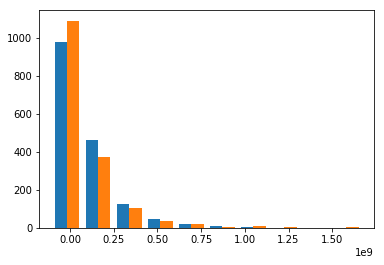

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist([predicted,Y_test])

### Polinomial Regression

- **Overfitting:** The model is very complex. The polimial degree is high so it can predict with high accuracy the train set but it cannot predict with high accuracy the test set.

- **Underfitting:** The model is very simple, so it cannot predict with good performance. The error rate is high!

### Refined Performance

**r2 score**

In [40]:
model.score(X_test,Y_test)

0.8822043534918065

**Residual**: Difference between real values and predicted values.

Text(0.5, 1.0, 'Residuals')

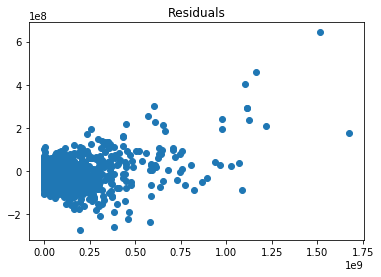

In [43]:
residuals = Y_test - predicted
plt.scatter(Y_test, residuals)
plt.title('Residuals')

**Porcentual Error**

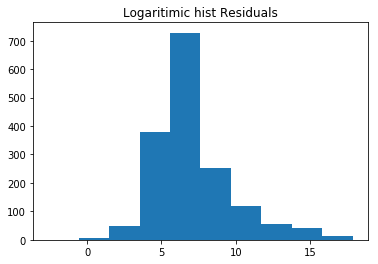

In [52]:
ap_residual = np.log(np.absolute((Y_test - predicted)/Y_test)*1000) # logaritmic scale
plt.hist(ap_residual, bins=10)
plt.title('Logaritimic hist Residuals')
plt.show()

In [ ]:
plt.hist(ap_residual, bins=10)
plt.title('Logaritimic cumulative distribution Residuals')
plt.show()